In [27]:
import pandas as pd
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import os 

import cv2

In [28]:
classes = os.listdir('Training')
classestest=os.listdir('Test')

In [29]:
training_dataset=[] 
training_labels=[]
id=0
dictionaryfruit={}
for foldernames in classes:
    filename=list(os.listdir('Training/'+foldernames))
    for files in filename:
        img=cv2.imread('Training/'+foldernames+"/"+files)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        training_dataset.append(img)
        training_labels.append(id)
    dictionaryfruit[id]=foldernames
    id+=1

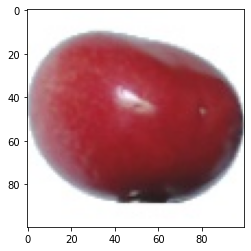

In [30]:
plt.imshow(training_dataset[0])

In [31]:
testing_dataset=[]
testing_labels=[]
id=0

for foldernames in classes:
    filename=list(os.listdir('Test/'+foldernames))
    for files in filename:
        img=cv2.imread('Test/'+foldernames+"/"+files)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        testing_dataset.append(img)
        testing_labels.append(id)
    id+=1

In [32]:
training_features=np.array(training_dataset)
triaining_labels=np.array(training_labels)
testing_features=np.array(testing_dataset)
testing_labels=np.array(testing_labels)
training_features.shape

(41322, 100, 100, 3)

In [36]:
import random 
from sklearn import utils

training_features,training_labels=utils.shuffle(training_features,training_labels)
testing_features,testing_labels=utils.shuffle(testing_features,testing_labels)

Apple Granny Smith


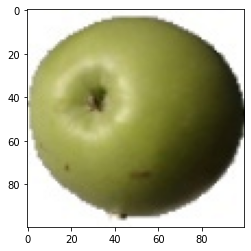

In [37]:
plt.imshow(training_features[11])

print(dictionaryfruit[training_labels[11]])

In [38]:
from tensorflow.keras.utils import to_categorical

training_labels=to_categorical(training_labels) 
testing_labels=to_categorical(testing_labels)

In [39]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

def createmodel():
    model=Sequential()
    model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(100,100,3)))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.7))
    model.add(Dense(len(classes),activation='softmax'))

    return model

In [ ]:
model=createmodel()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

In [41]:
history=model.fit(training_features,training_labels,batch_size=256,epochs=21,verbose=1,validation_data=(testing_features,testing_labels))

2022-06-23 09:15:51.805914: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/21


2022-06-23 09:15:53.199510: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8300


162/162 [==============================] - 25s 123ms/step - loss: 11.2974 - accuracy: 0.1833 - val_loss: 1.4833 - val_accuracy: 0.6074
Epoch 2/21
162/162 [==============================] - 19s 116ms/step - loss: 1.1169 - accuracy: 0.6717 - val_loss: 0.5064 - val_accuracy: 0.8560
Epoch 3/21
162/162 [==============================] - 19s 118ms/step - loss: 0.5368 - accuracy: 0.8316 - val_loss: 0.3552 - val_accuracy: 0.8941
Epoch 4/21
162/162 [==============================] - 20s 120ms/step - loss: 0.3503 - accuracy: 0.8870 - val_loss: 0.3444 - val_accuracy: 0.9074
Epoch 5/21
162/162 [==============================] - 19s 120ms/step - loss: 0.2434 - accuracy: 0.9198 - val_loss: 0.2164 - val_accuracy: 0.9436
Epoch 6/21
162/162 [==============================] - 19s 117ms/step - loss: 0.1934 - accuracy: 0.9353 - val_loss: 0.2007 - val_accuracy: 0.9446
Epoch 7/21
162/162 [==============================] - 19s 116ms/step - loss: 0.1720 - accuracy: 0.9425 - val_loss: 0.2170 - val_accuracy: 0.

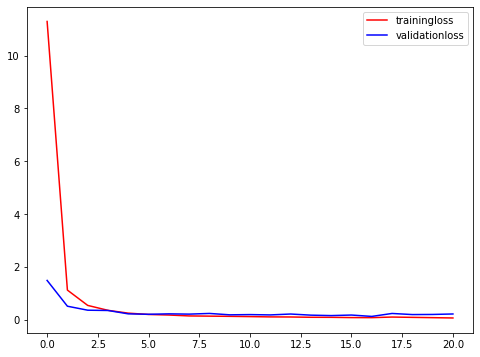

In [42]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend(['trainingloss','validationloss'])

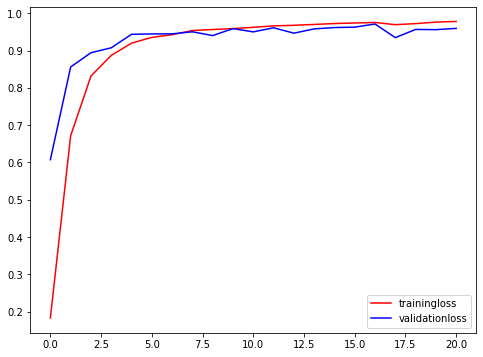

In [43]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend(['trainingloss','validationloss'])


Tomato 3


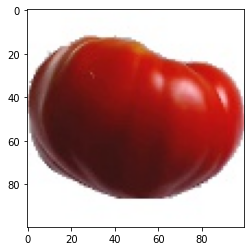

In [57]:
trainer=[]
trainer.append(testing_features[1])
trainer=np.array(trainer)
val=model.predict(trainer)[0]
classes_x=np.argmax(val)
classes_x
plt.imshow(testing_features[1])
print(dictionaryfruit[classes_x])